<h1 style="font-size:32px;font-weight:400">Financial Time Series from Scratch with Python</h1>
<h2 style="font-size:28px;font-weight:300;color:#0000B3;">GARCH</h2>
<h3 style="font-size:18px;font-weight:400">Joseph Vanderselt, CFA, CPA</h3>
<a href="mailto: josephva@uchicago.edu">josephva@uchicago.edu</a> | 
<a href="https://www.linkedin.com/in/joe-vanderstelt-cfa-cpa-48172925/">LinkedIn</a>

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

<h2 style="color:#0000B3;font-size:20px;font-weight:300">Daily Stock Prices</h2>
Amazon daily stock price from 2008-01-03 to 2021-05-14

In [3]:
# Load in some price data
df = pd.read_csv("../_Datasets/AMZN.csv")
df.head(5)

,Open,High,Low,Close,Volume,Adjusted
0,96.059998,97.250000,94.519997,95.209999,9122500,95.209999
1,93.260002,93.400002,88.500000,88.790001,10270000,88.790001
2,88.620003,90.570000,85.470001,88.820000,9981600,88.820000
3,87.550003,91.830002,86.930000,87.879997,12283300,87.879997
4,87.559998,87.800003,80.239998,85.220001,16410900,85.220001


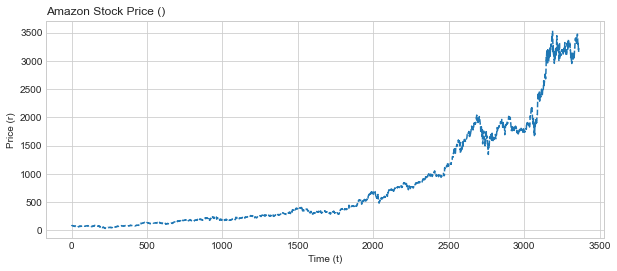

In [4]:
# Plot the price
plt.figure(figsize=(10,4))
plt.plot(df["Adjusted"],linestyle="--")
plt.xlabel("Time (t)")
plt.ylabel("Price (r)")
plt.title("Amazon Stock Price ()",loc="left")
plt.show()

<h2 style="color:#0000B3;font-size:20px;font-weight:300">Time Series</h2>
Log returns of daily stock price

In [5]:
# Log returns of stock price
at = np.diff(
    np.log(
        np.array(df["Adjusted"].tolist())
    )
)
at

array([-0.06981093,  0.00033781, -0.01063964, ...,  0.01042037,
       -0.02257676,  0.00301898])

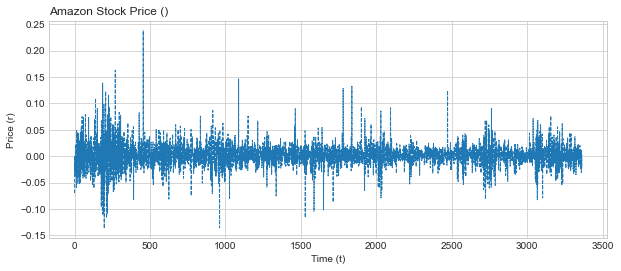

In [6]:
# Plot the log of price
plt.figure(figsize=(10,4))
plt.plot(at,linestyle="--",linewidth=1)
plt.xlabel("Time (t)")
plt.ylabel("Price (r)")
plt.title("Amazon Stock Price ()",loc="left")
plt.show()

<h2 style="color:#0000B3;font-size:20px;font-weight:300">Extension of ARCH</h2>

![alt text](GARCH.png)

<h2 style="color:#0000B3;font-size:20px;font-weight:300">Concept</h2>

Let $a_{t}$ be the value of the time series today.

$
\;\;\;\;\;\;\;
a_{t} = \epsilon_{t}\sigma_{t}
$

with variance of the error being

$
\;\;\;\;\;\;\;
Var(\epsilon_{t}) = \sigma_{t}^2 = \alpha_{0}+\alpha_{1}\sigma_{t-1}^2
$

and with an error term

$
\;\;\;\;\;\;\;
\epsilon_{t} = \omega_{t}\sqrt{\alpha_{0}+\alpha_{1}\epsilon_{t-1}^2}
$

$
\;\;\;\;\;\;\;
\epsilon_{t}^2 = \omega_{t}^2(\alpha_{0}+\alpha_{1}\epsilon_{t-1}^2)
$

$
\;\;\;\;\;\;\;
\epsilon_{t}^2 = \omega_{t}^2\alpha_{0}+\omega_{t}^2\alpha_{1}\epsilon_{t-1}^2
$

where $\epsilon_{t-1}^2$ is handled by standard auto regressive model; the test is at the first lag of an ACF, the correlation factor should be greater than the band. Then finally, 

$
\;\;\;\;\;\;\;
a_{t} = \epsilon_{t}\sigma_{t}
$

$
\;\;\;\;\;\;\;
a_{t} = \omega_{t}\sqrt{\alpha_{0}+\alpha_{1}a_{t-1}^2}
$

In [ ]:
# Produced by R
mu = 0.0136
omega = 0.0087<h2 style="color:#0000B3;font-size:28px;font-weight:300">Dataset</h2> 
alpha1 = 0.464


$\alpha_{0}$ = omega

$r_{t} = \mu + a_{t}$

$r_{t} = \mu + \sigma_{t}{(a)}\epsilon_{t}$

$
\sigma{(a_{t})}^2 = \frac{\alpha_{0}}{1-\alpha_{1}}
$

$r_{t} = \mu + \sqrt{\frac{\alpha_{0}}{1-\alpha_{1}}}\epsilon_{t}$

In [ ]:
sigma = (omega / (1-alpha1))**0.5
sigma

In [ ]:
# ARIMA model parameters (m1)
ar1 = 0.089     
ar2 = -0.024
ar3 = -0.123

# conditional variance
cv = 0.00333

# unconditional variance
uv = cv * (1-ar1-ar2-ar3)

print(cv)
print(uv)